In [2]:
import numpy as np
import scipy.stats as stats #new library
import matplotlib.pyplot as plt

In [3]:

# Data
arrivals = np.array([8, 12, 10, 15, 9, 13, 11, 14, 7, 16, 10, 12, 9, 15, 11, 13, 14, 8, 12, 10])

# Calculate mean
mean_arrival = np.mean(arrivals)

# Sample variance (ddof=1)
var_sample = np.var(arrivals, ddof=1)

# Population variance (ddof=0)
var_population = np.var(arrivals, ddof=0)

# Standard deviation (sample)
std_dev = np.std(arrivals, ddof=1)

print(f"Mean: {mean_arrival:.2f}")
print(f"Sample Variance: {var_sample:.2f}")
print(f"Population Variance: {var_population:.2f}")
print(f"Standard Deviation (Sample): {std_dev:.2f}")

# Explanation
print("\nExplanation:")
print("Population variance uses denominator N (total number of data points), while sample variance uses N-1 to provide an unbiased estimator when working with samples.")


Mean: 11.45
Sample Variance: 6.68
Population Variance: 6.35
Standard Deviation (Sample): 2.58

Explanation:
Population variance uses denominator N (total number of data points), while sample variance uses N-1 to provide an unbiased estimator when working with samples.


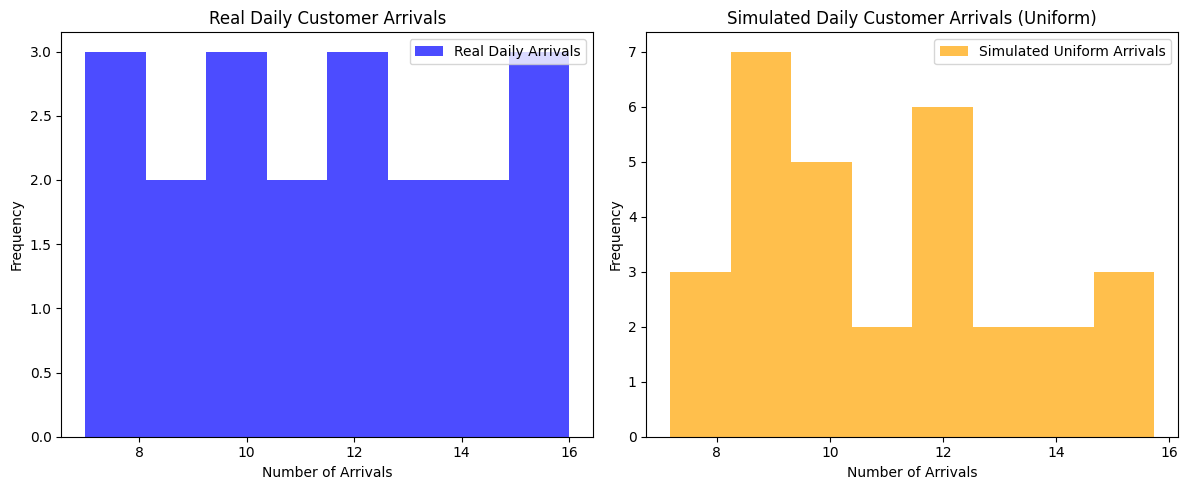

In [4]:
# Simulate uniform distribution between min and max of actual data
min_arrival = np.min(arrivals)
max_arrival = np.max(arrivals)

np.random.seed(42)
simulated_arrivals = np.random.uniform(low=min_arrival, high=max_arrival, size=30)

# Plot histograms side by side
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(arrivals, bins=8, color='blue', alpha=0.7, label='Real Daily Arrivals')
plt.title('Real Daily Customer Arrivals')
plt.xlabel('Number of Arrivals')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(simulated_arrivals, bins=8, color='orange', alpha=0.7, label='Simulated Uniform Arrivals')
plt.title('Simulated Daily Customer Arrivals (Uniform)')
plt.xlabel('Number of Arrivals')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
# Monte Carlo simulation
samples = np.random.uniform(low=min_arrival, high=max_arrival, size=100000)

prob_more_than_15 = np.mean(samples > 15)

print(f"Estimated Probability that more than 15 customers arrive: {prob_more_than_15:.4f}")


Estimated Probability that more than 15 customers arrive: 0.1095


Hypothesized Mean: 14
T-statistic: -4.4118
P-value: 0.0003


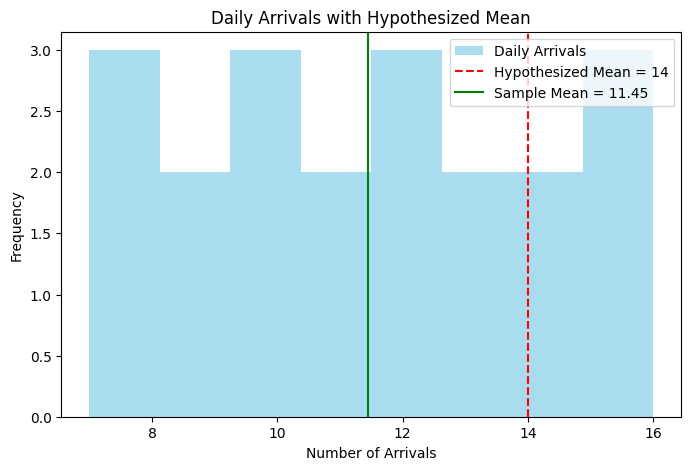

Reject the null hypothesis: The average daily arrivals is significantly different from the hypothesized mean.


In [6]:
# Define your student ID last 3 digits
student_id_last3 = 94  # Change this to your actual last 3 digits

hypothesized_mean = (student_id_last3 % 10) + 10

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(arrivals, hypothesized_mean)

print(f"Hypothesized Mean: {hypothesized_mean}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Visualization
plt.figure(figsize=(8, 5))
plt.hist(arrivals, bins=8, alpha=0.7, color='skyblue', label='Daily Arrivals')
plt.axvline(hypothesized_mean, color='red', linestyle='--', label=f'Hypothesized Mean = {hypothesized_mean}')
plt.axvline(mean_arrival, color='green', linestyle='-', label=f'Sample Mean = {mean_arrival:.2f}')
plt.title('Daily Arrivals with Hypothesized Mean')
plt.xlabel('Number of Arrivals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The average daily arrivals is significantly different from the hypothesized mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference from the hypothesized mean.")
